<a href="https://colab.research.google.com/github/tufte28/MAT-494/blob/main/MAT494_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 1.4: Principal Component Analysis

Singular Value Decomposition

In [66]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.ensemble import RandomForestClassifier

X,y = load_digits(return_X_y=True)
print(X.shape)
print(y)

(1797, 64)
[0 1 2 ... 8 9 8]


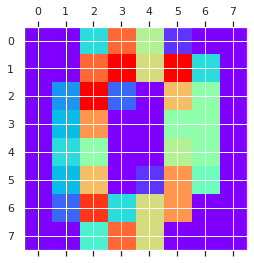

In [67]:
image = X[0]
image = image.reshape((8,8))
plt.matshow(image, cmap='rainbow')

Now, applying Singular Value Decomposition

In [68]:
U, s, V = np.linalg.svd(image)
S = np.zeros((image.shape[0],image.shape[1]))
S[:image.shape[0],:image.shape[0]] = np.diag(s)
n_component = 2
S2 = S[:, :n_component]
V2 = V[:n_component, :]
A = U.dot(S2.dot(V2))
print(A)

[[0.00 -1.10 4.74 12.16 9.52 2.44 -1.33 0.00]
 [0.00 1.81 15.31 13.79 11.23 12.27 4.48 0.00]
 [0.00 3.86 13.36 1.19 1.49 12.59 7.65 0.00]
 [0.00 3.39 10.76 -0.35 0.20 10.36 6.61 0.00]
 [0.00 3.11 9.52 -0.85 -0.24 9.26 6.04 0.00]
 [0.00 3.61 11.79 0.12 0.60 11.27 7.07 0.00]
 [0.00 2.08 12.63 8.58 7.13 10.60 4.66 0.00]
 [0.00 -1.18 4.88 12.71 9.96 2.47 -1.44 0.00]]


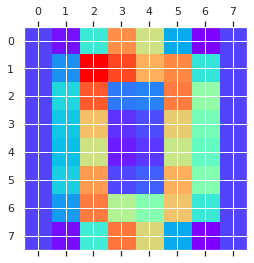

In [69]:
plt.matshow(A, cmap='rainbow')

Principal Component Analysis

Loading in Data and Shaping

In [70]:
from sklearn.datasets import load_wine
winedata = load_wine()
X, y = winedata['data'], winedata['target']
print(X.shape)
print(y.shape)

(178, 13)
(178,)


Execute PCA including normalizing the scale

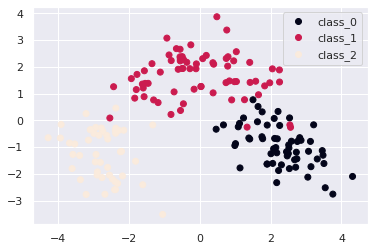

In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pca=PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()